In [26]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [27]:
cur_balance = pd.read_csv('last_data_csv')

In [18]:
cur_balance.head()

,name,lastname,currency_name,currency_in_usd
0,Иван,Иванов,EUR,150.100
1,Иван,Иванов,EUR,17.000
2,Иван,Иванов,EUR,158.000
3,not defined,not defined,JPY,0.948
4,not defined,not defined,USD,120.000


In [28]:
cur_balance["full_name"] = cur_balance["name"] + ' ' + cur_balance["lastname"]

cur_balance = cur_balance.drop(['name', 'lastname'], axis=1)

In [21]:
cur_balance.head()

,currency_name,currency_in_usd,full_name
0,EUR,150.100,Иван Иванов
1,EUR,17.000,Иван Иванов
2,EUR,158.000,Иван Иванов
3,JPY,0.948,not defined not defined
4,USD,120.000,not defined not defined


/Users/sviatie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

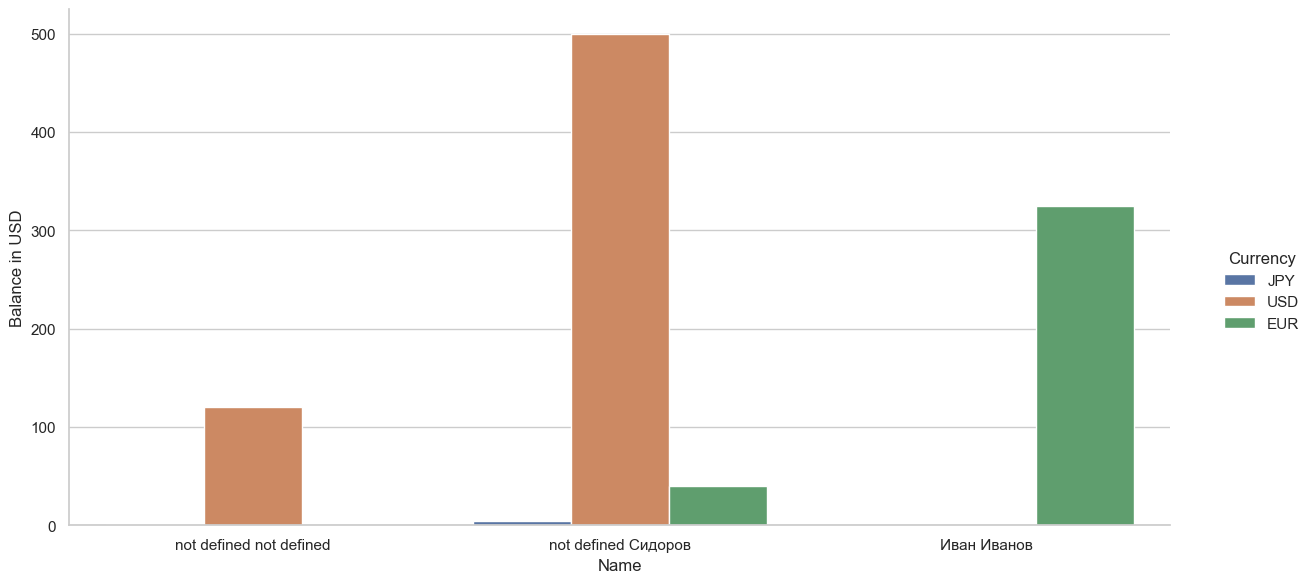

In [36]:
aggregated_df = cur_balance.groupby(['full_name', 'currency_name'], as_index=False).sum()

# Plotting

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
g = sns.catplot(
    data=aggregated_df, 
    kind="bar", 
    x="full_name", 
    y="currency_in_usd", 
    hue="currency_name", 
    height=6, 
    aspect=2
)
g.set_axis_labels("Name", "Balance in USD")
g.set_titles("Currencies and their values for each name")
g.legend.set_title("Currency")

plt.show()